#Objectives
Fake Bank Note Detection (classification) using Decision Tree Model

In [ ]:
#Imports the python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Dataset Information:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tools were used to extract features from images.

##Tasks:
1.	Load the banknote dataset using pandas
2.	Analyze the dataset using pandas
3.	Preparing the dataset (X-Y and train-test split)
4.	Use decision tree classifiers to make predictions (Use Scikit-learn library)
5.	Evaluate the predictions [Confusion Matrix, F1-score, Classification report] (Use Scikit-learn).

#Data Pre-Processing
Before we can begin to create our model we first need to load and pre-process. This step ensure that our model will receive a good data to learn from, as they said "a model is only as good as it's data". The data pre-processing will be divided into few steps as explained below.

##Loading data
In this first step we will load our dataset that has been uploaded on my GoogleDrive for easier process.

In [ ]:
#Loading data
from google.colab import files
uploaded = files.upload()

Saving bill_authentication.csv to bill_authentication.csv


In [ ]:
# Import the dataset
df = pd.read_csv('bill_authentication.csv')

In [ ]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


###We can see below are the list of columns we have in our data:

Input variables:
0. variance - variance is the amount by which something changes or is different from something else.
1. skewness - skewness is the amount by which something changes or is different from something else.
2. kurtosis - kurtosis refers to the pointedness of a peak in the distribution curve.
3. entropy - entropy is the measure of disorder or uncertanity

Output variable (desired target):
4. Class

###Summary of the dataset

In [ ]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


From the Describe table, we have found the overall measures of central tendencies (description of our dataset) and the dispersion (how distributed values around the central tendency). The count represents that there are no missing values in this data set.

The interquartile range (IQR) is the difference between the Q1 and Q3 (the spread of the middle 50% of values). An observation to be an outlier is if it has a value 1.5 times greater or less than the IQR. There are potential outliers in our dataset.


### Class Distribution

Another important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [ ]:
# Count the number of observations of each class
print('Observations per class: \n', df['Class'].value_counts())

Observations per class: 
 0    762
1    610
Name: Class, dtype: int64


As we can see our class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

## Pairplot
A pairs plot allows us to see both distribution of single variables and relationships between two variables

The default pairs plot in seaborn only plots numerical columns.

The pairs plot builds on two basic figures:

the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable.

while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

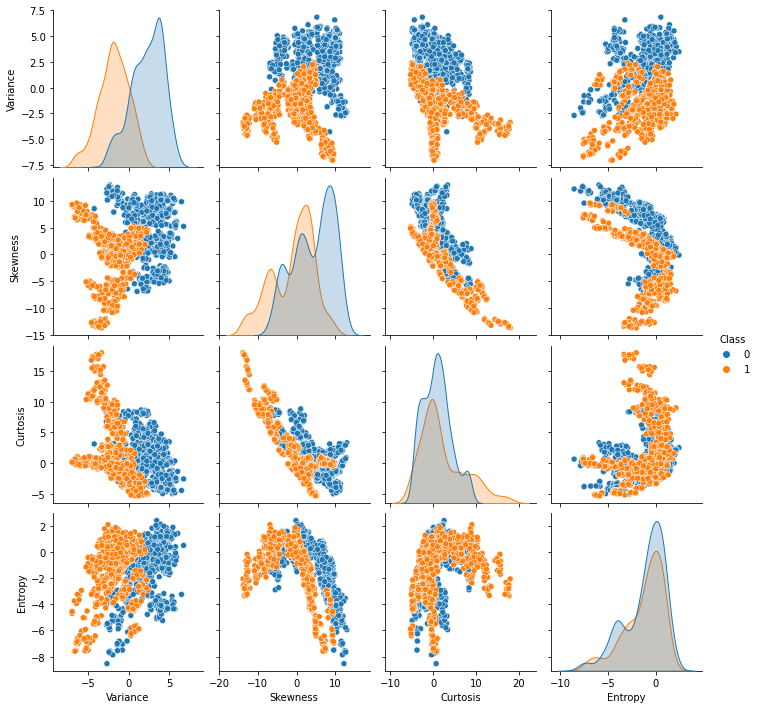

In [ ]:
# Use pairplot and set the hue to be our class
sns.pairplot(df, hue='Class') 

# Show the plot
plt.show()

Here, we can analyse the mean and distribution of data. The mean of the 'Class' is close to 0.5 (which makes it clear that the data is balanced). The scatter plots show that the classes are distinct and separate.

Evaluation of Pirplot: By looking at the plots, we can say that the data is easily separable.

##Correlation Heat Map
Correlation heat map is showing which features are related to each other represented by colours.

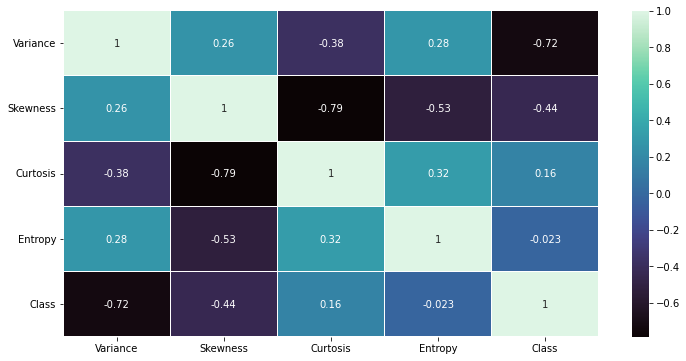

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='mako',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

High Negative Co-relation between: skewness and Curtosis.

And high Co-relation between: Curtosis and Entropy.

As mentionned, variables "skewness" and "curtoisis" are negatively correlated. Variance is stongly correlated with classification in comparison with other variables. This confirm our previous guess that it might be the most influential variable.

Evaluation: The correlations are all over the place, but these show that the data is appropriate for training a decision tree.

In [ ]:
# correlation of all columns with target variable. More the value is away from zero, more the feature importance
df.corr()['Class']

Variance   -0.724843
Skewness   -0.444688
Curtosis    0.155883
Entropy    -0.023424
Class       1.000000
Name: Class, dtype: float64

##Data Distribution Plots:
Let us plot the data distribution for each of the variables.

Text(0.5, 6.79999999999999, 'Variance')

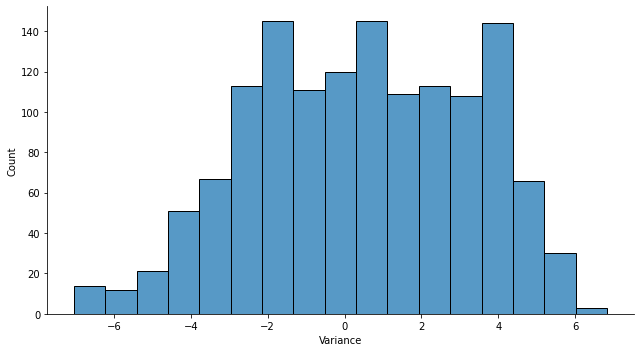

In [ ]:
# number of classes present in the dataset
sns.displot(df["Variance"], height= 5, aspect=1.8)
plt.xlabel("Variance")

Variance seems to follow a somewhat Normal distribution.

Text(0.5, 6.79999999999999, 'Skewness')

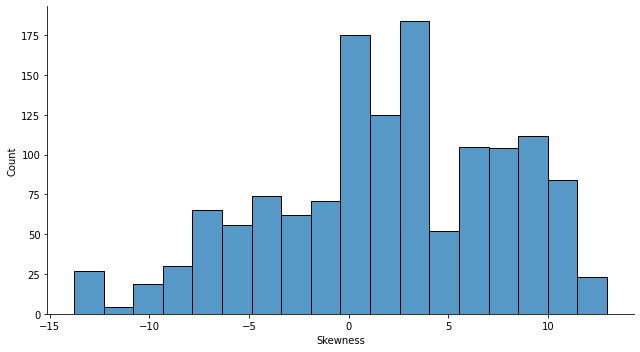

In [ ]:
sns.displot(df["Skewness"], height= 5, aspect=1.8)
plt.xlabel("Skewness")

Skewness is more distributed to the positive side.

Text(0.5, 6.79999999999999, 'Curtosis')

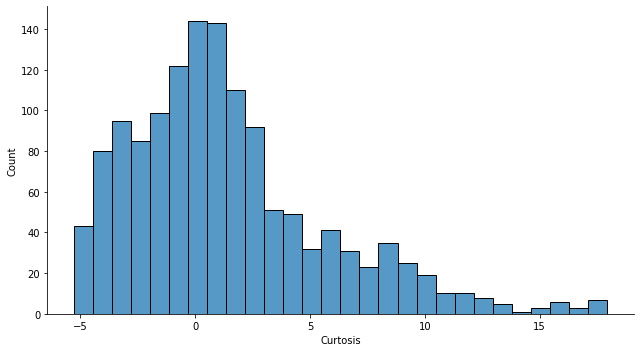

In [ ]:
sns.displot(df["Curtosis"], height= 5, aspect=1.8)
plt.xlabel("Curtosis")

Kurtosis is more skewed to the negative side, with maximum data points being near zero.

Text(0.5, 6.79999999999999, 'Entropy')

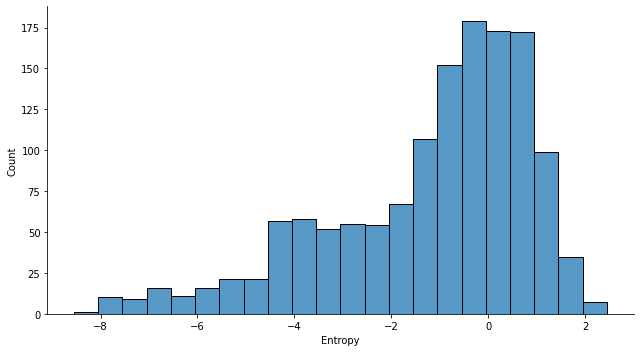

In [ ]:
sns.displot(df["Entropy"], height= 5, aspect=1.8)
plt.xlabel("Entropy")

The data distribution of Entropy seems to be the opposite of Kurtosis.

##Let us see the class distribution.

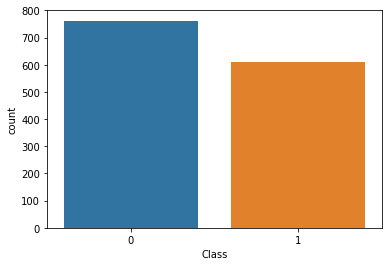

In [ ]:
sns.countplot(x=df["Class"])

Class distribution is not exactly 50:50 distribution but still good enough. So, we can confirm that the classes are balanced.

#Modeling

##Decision Tree
Decision tree is a tree shaped diagram used to determine a course of action. Each branch of the tree represents a possible decision, occurrence or reaction.

Advantages:
* Inexpensive to construct
* Extremely fast at classifying unknown records
* Easy to interpret for small-sized trees•
* Accuracy is comparable to other classification techniques for many simple data sets

Disadvantages:
* Overfitting when algorithm capture noise in the data
* The model can get unstable due to small variation of data
* Low biased tree: difficult for the model to work with new data

##Feature and target selection

In [ ]:
# feature and target selection

# input feature vector
X=df.iloc[:,:-1] # all columns except last as features

# labelled target vector
y=df.iloc[:,-1:] # last column as target

##Split Dataset for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

# spliting 80% data as training data and remaining 20% data as testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

## Decision Tree Classifiaction & Fitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_e = DecisionTreeClassifier(criterion='entropy', max_depth=3, ccp_alpha=0.01, random_state=0)
clf_e.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=3,
                       random_state=0)

####Lookover the parameter of DecisionTreeeClassifier:

In [ ]:
clf_e.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

##Pruning decision trees with cost complexity pruning (ccp_alpha):
Pruning is one of the techniques that is used to overcome our problem of Overfitting. Pruning, in its literal sense, is a practice which involves the selective removal of certain parts of a tree(or plant), such as branches, buds, or roots, to improve the tree’s structure, and promote healthy growth

##Prediction

In [ ]:
# Predict the model
y_pred_e = clf_e.predict(X_test)
y_pred_e

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

##Model Evaluation

After making sure our data is good and ready we can continue to building our model. In this notebook we have tried to build a model. In this step we have created a model using the default paramaeters set by sklearn. To evaluate our model we will use the confusion matrix as our base for the evaluation.

We will use 4 metrics below to evaluate models:

TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

1. Accuracy: the proportion of true results among the total number of cases examined. Accuracy=(TP+TN)/(TP+TN+FP+FN)

2. Precision: used to calculate how much proportion of all data that was predicted positive was actually positive. Precision=TP/(TP+FP)

3. Recall: used to calculate how much proportion of actual positives is correctly classified. Recall=TP/(TP+FN)

4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall. F1=2TP/(2TP+FP+FN)

1. Accuracy describing the number of correct predictions over all predictions.
This is perhaps the most intuitive of the model evaluation metrics, and thus commonly used. The decision tree classifier gave an accuracy of 97%. and the misclassification Rate (Error Rate) = 3%.

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
print('accuracy using entropy: ',accuracy_score(y_pred_e,y_test))

accuracy using entropy:  0.9672727272727273


But often it is useful to also look a bit deeper.

Some basic terms are Precision, Recall, and F1-Score. These relate to getting a finer-grained idea of how well a classifier is doing, as opposed to just looking at overall accuracy.

2. Precision is a measure of how many of the positive predictions made are correct (true positives)

In [ ]:
# Precision Score
from sklearn.metrics import precision_score
ps_e = precision_score(y_pred_e,y_test)
print(ps_e)

0.9914529914529915


3. Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data

In [ ]:
# Recall Score
from sklearn.metrics import recall_score
rs_e = recall_score(y_pred_e,y_test)
print(rs_e)

0.9354838709677419


4. F1 Score: This is a weighted average of the true positive rate (recall) and precision.

In [ ]:
# F1 Score
from sklearn.metrics import f1_score
f1_e = f1_score(y_pred_e, y_test)
print(f1_e)

0.962655601659751


###The Confusion Matrix
The Confusion Matrix gives us a complete summary of correct and incorrect predictions broken down by each category, throwing light on the performance of the classification models and the errors made by the model.

A confusion matrix has four possible outcomes namely True Positive, True Negative (Specificity), False Positive (Type I Error), and False Negative (Type II Error).

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
cfm_e = confusion_matrix(y_pred_e, y_test)
cfm_e

array([[150,   1],
       [  8, 116]])

It means 9 observations have been classified as false.

##A Classification report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report.

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred_e,y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       151
           1       0.99      0.94      0.96       124

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.97       275
weighted avg       0.97      0.97      0.97       275



##Final Evaluation:
From the figures above we can see that our Decision Tree model in 4 metrics we evaluate. So we can assume that Decision Tree model is the right choice to solve our problem.

If there is a complex relationship between dependent & independent variables, a tree model will outperform than other methods.

If we need to build a model that is easy to explain to people, a decision tree model will always do better than other model even simpler to interpret.

#Feature Importance
Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature.

A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [ ]:
feature_names=X.columns
feature_importance = pd.DataFrame(clf_e.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Variance,0.700882
Skewness,0.157964
Curtosis,0.141154
Entropy,0.000000


In [ ]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['Variance', 'Skewness', 'Curtosis']

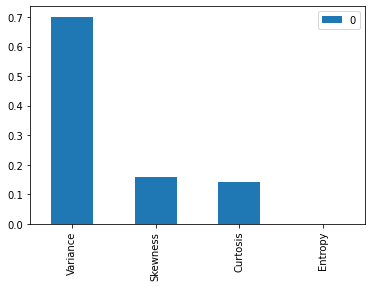

In [ ]:
feature_importance.head(10).plot(kind='bar')

#Visualize a Decision Tree

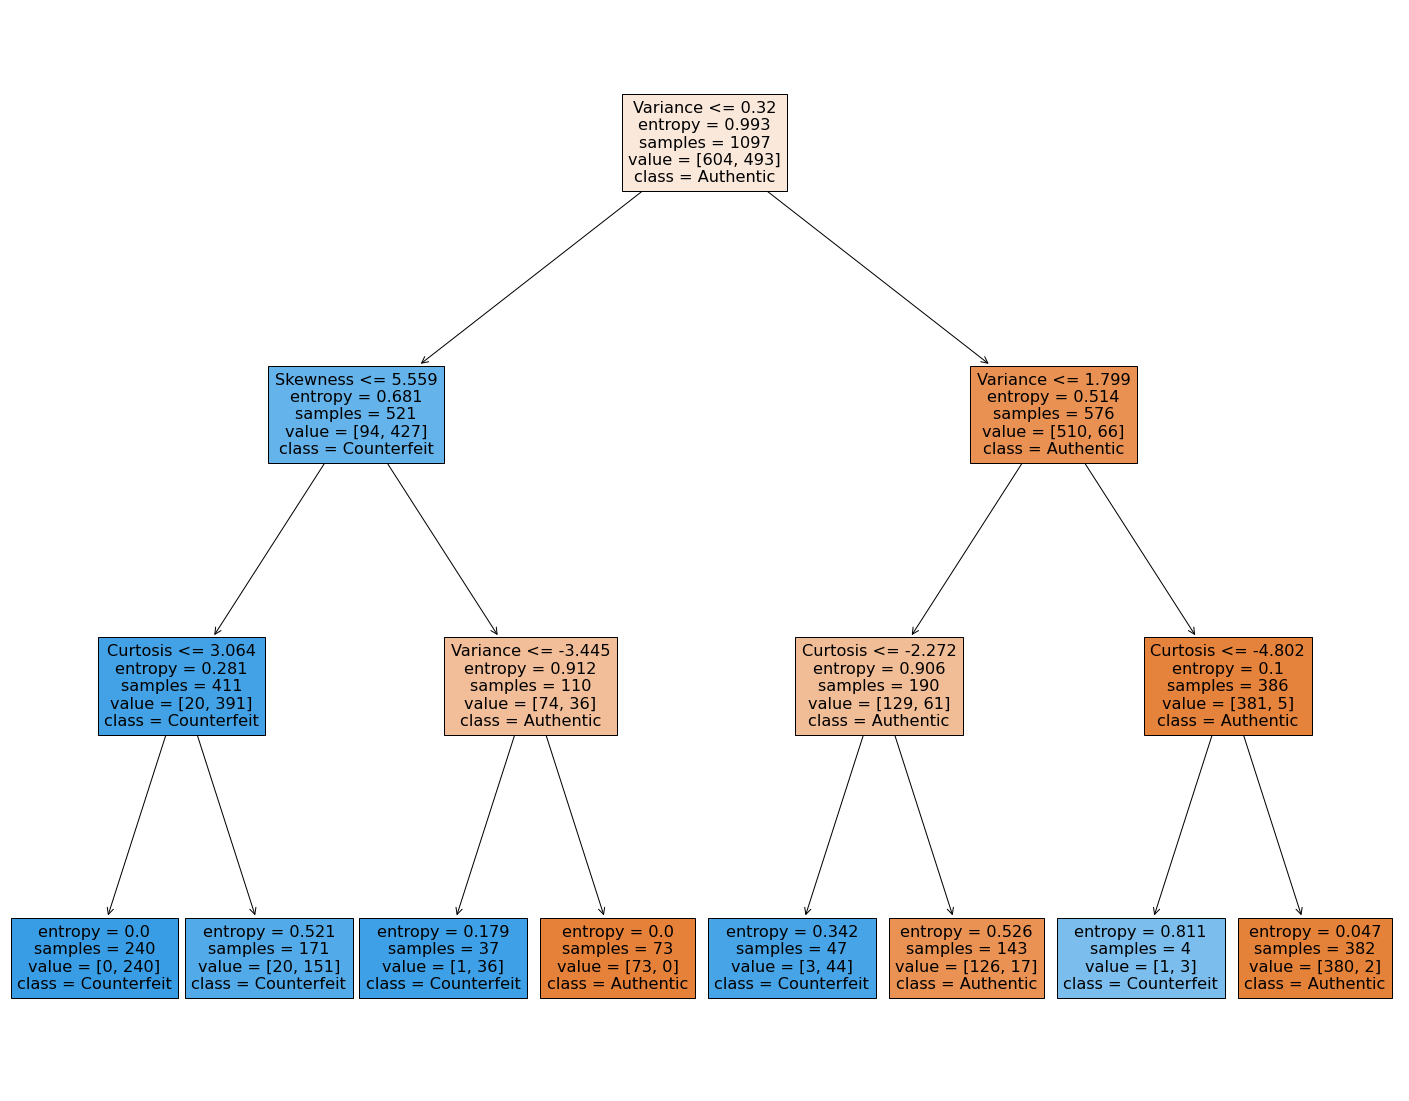

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_e, feature_names=feature_names, class_names={0: 'Authentic', 1: 'Counterfeit'}, filled=True)